## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_2908-0309-2023.csv', firstRow=792, lastRow=798)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_010923_S793-798.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=76s and ended at t=500s; mass=44.99905g
This equals a volume of 45.089m; expected was 45.667mL; error is 1.266%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.001 g/s and for 2nd derivative = 0.0002 g/s^2


<IPython.core.display.Javascript object>


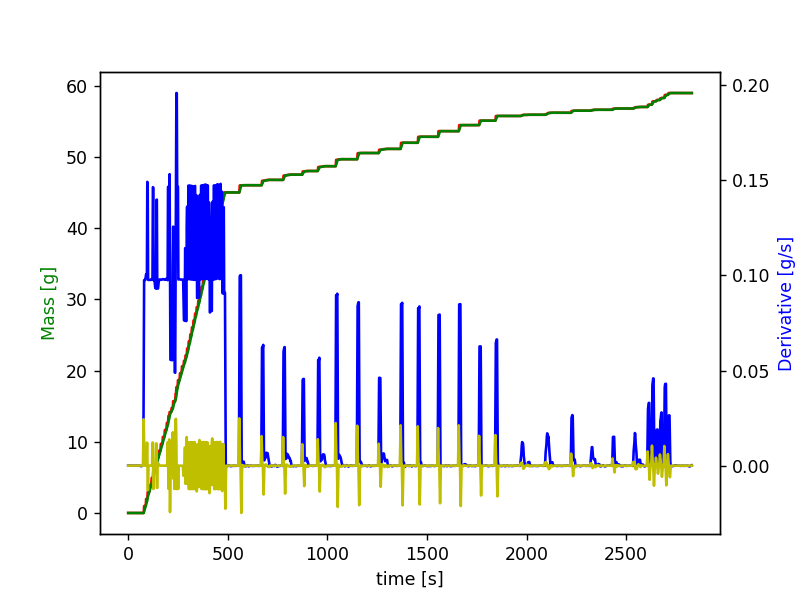

Addition of 1.021g Plantapon ACG 50 detected from 554s to 588s - expected volume = 0.976mL and actual volume = 0.909mL (resulting error is 6.919%)
Addition of 0.757g Plantapon LC 7 detected from 666s to 714s - expected volume = 0.974mL and actual volume = 0.713mL (resulting error is 26.789%)
Addition of 0.739g Plantacare 818 detected from 774s to 824s - expected volume = 0.858mL and actual volume = 0.68mL (resulting error is 20.751%)
Addition of 0.516g Plantacare 2000 detected from 870s to 910s - expected volume = 0.586mL and actual volume = 0.474mL (resulting error is 19.122%)
Addition of 0.676g Plantacare 2000 detected from 948s to 998s - expected volume = 0.586mL and actual volume = 0.621mL (resulting error is 5.992%)
Addition of 0.986g Plantacare 2000 detected from 1038s to 1078s - expected volume = 0.928mL and actual volume = 0.908mL (resulting error is 2.173%)
Addition of 0.876g Dehyton MC detected from 1146s to 1178s - expected volume = 0.884mL and actual volume = 0.815mL (resul

In [3]:
# default: bl_mult=5, mergeSens=10
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

#t2 = massProfile.defineIngredientsManually(specType='surfactant',steps=steps,show=True,manualTimes=[560,600,700,800,900,1000,1100,1150,1250,1320,1400,1500,1580,1650,1730,1830,1920,2000,2080,2140])

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.00025 g/s^2


<IPython.core.display.Javascript object>


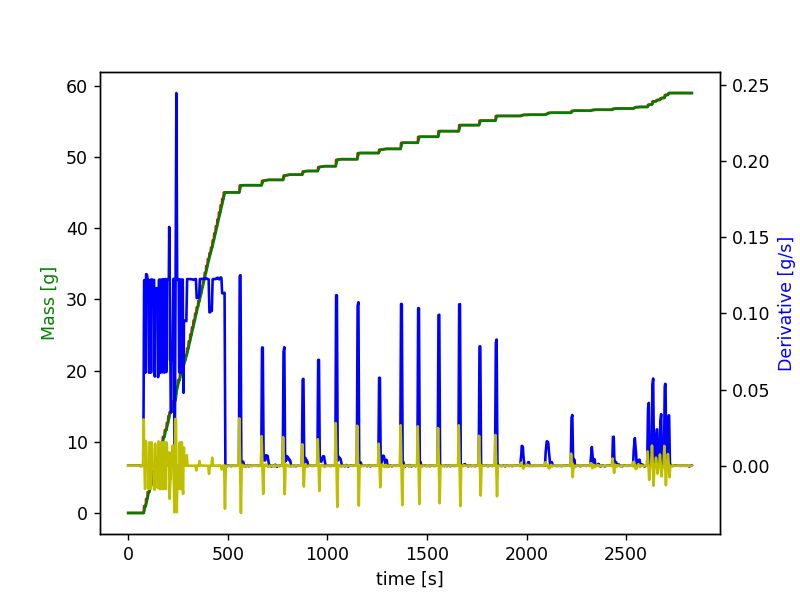

Addition of 0.176g Dehyquart CC7 Benz detected from 1966s to 2020s - expected volume = 0.182mL and actual volume = 0.173mL (resulting error is 4.73%)
Addition of 0.29g Dehyquart CC7 Benz detected from 2090s to 2136s - expected volume = 0.277mL and actual volume = 0.282mL (resulting error is 1.623%)
Addition of 0.293g Dehyquart CC7 Benz detected from 2220s to 2248s - expected volume = 0.278mL and actual volume = 0.29mL (resulting error is 4.359%)
Addition of 0.136g Dehyquart CC7 Benz detected from 2318s to 2370s - expected volume = 0.112mL and actual volume = 0.135mL (resulting error is 21.205%)
Addition of 0.17g Dehyquart CC7 Benz detected from 2428s to 2458s - expected volume = 0.156mL and actual volume = 0.168mL (resulting error is 8.121%)
Addition of 0.224g Dehyquart CC7 Benz detected from 2532s to 2576s - expected volume = 0.203mL and actual volume = 0.221mL (resulting error is 8.859%)


In [6]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=7, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

#t3 = massProfile.defineIngredientsManually(specType='polyelectrolyte',steps=steps,show=True,manualTimes=[2152,2256,2366,2482,2582,2680,2758])

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.001 g/s^2


<IPython.core.display.Javascript object>


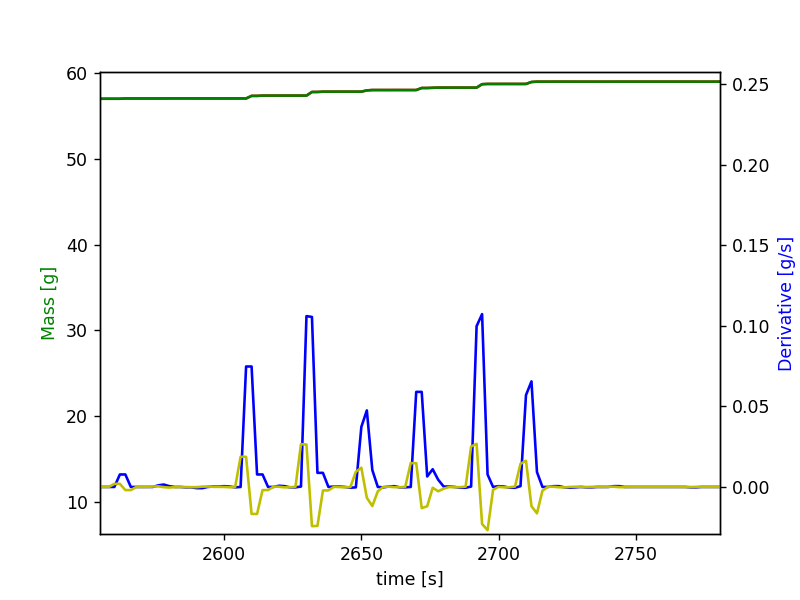

Addition of 0.331g Arlypon TT detected from 2604s to 2620s - expected volume = 0.387mL and actual volume = 0.344mL (resulting error is 11.126%)
Addition of 0.459g Arlypon TT detected from 2626s to 2642s - expected volume = 0.474mL and actual volume = 0.471mL (resulting error is 0.758%)
Addition of 0.189g Arlypon TT detected from 2646s to 2660s - expected volume = 0.146mL and actual volume = 0.197mL (resulting error is 35.0%)
Addition of 0.28g Arlypon TT detected from 2666s to 2684s - expected volume = 0.26mL and actual volume = 0.295mL (resulting error is 13.36%)
Addition of 0.43g Arlypon TT detected from 2688s to 2702s - expected volume = 0.459mL and actual volume = 0.45mL (resulting error is 1.941%)
Addition of 0.263g Arlypon TT detected from 2706s to 2720s - expected volume = 0.235mL and actual volume = 0.274mL (resulting error is 16.593%)


In [7]:
# default bl_mult = 1, default mergeSens = 1
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=1, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

#t4 = massProfile.defineIngredientsManually(specType='thickener',steps=steps,show=True,manualTimes=[2490,2506,2522,2538,2554,2568,2588])

## Consolidate results and create output

In [8]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_010923_S793-S798.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_33328\424176980.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
792,793.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,5.955519,8.824200,0.000000,0.000000,0.000000,0.0,0.0,1.796748,0.0,0.0,3.379416
793,794.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,7.978575,0.000000,12.949378,0.0,0.0,2.906660,0.0,0.0,4.601480
794,795.0,0.0,0.000000,0.000000,0.000000,11.809001,0.00000,0.0,0.000000,0.000000,0.000000,8.438683,0.000000,0.0,0.0,2.906900,0.0,0.0,1.873501
795,796.0,0.0,10.113623,0.000000,0.000000,0.000000,8.67547,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.344554,0.0,0.0,2.773298
796,797.0,0.0,0.000000,0.000000,7.431687,9.921996,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.708000,0.0,0.0,4.321567
797,798.0,0.0,0.000000,7.642675,0.000000,0.000000,0.00000,0.0,0.000000,8.532133,0.000000,0.000000,0.000000,0.0,0.0,2.264029,0.0,0.0,2.660297
